<a href="https://colab.research.google.com/github/codebyted/AI_Programming_Project/blob/main/AI_data_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


====== DATA ANALYZER ======
1. Load Dataset
2. Show Basic Info
3. Clean Data
4. Show Summary Stats
5. Visualize Data
6. Exit

Select a dataset (CSV or Excel)...


Saving dataset.csv to dataset.csv
Dataset loaded: dataset.csv

====== DATA ANALYZER ======
1. Load Dataset
2. Show Basic Info
3. Clean Data
4. Show Summary Stats
5. Visualize Data
6. Exit

BASIC INFO
   day  temp  humidity  rainfall
0    1    28        60         2
1    2    30        55         0
2    3    32        52         0
3    4    31        50         1
4    5    29        65         3 

Columns: ['day', 'temp', 'humidity', 'rainfall']
Shape: (10, 4)

====== DATA ANALYZER ======
1. Load Dataset
2. Show Basic Info
3. Clean Data
4. Show Summary Stats
5. Visualize Data
6. Exit

SUMMARY STATISTICS
         day   temp  humidity  rainfall
count  10.00  10.00     10.00     10.00
mean    5.50  29.40     61.00      1.70
std     3.03   2.22      8.29      1.83
min     1.00  26.00     50.00      0.00
25%     3.25  28.00     55.00      0.00
50%     5.50  29.50     60.00      1.50
75%     7.75  30.75     67.25      2.75
max    10.00  33.00     75.00      5.00

====== DATA ANALYZER ======
1

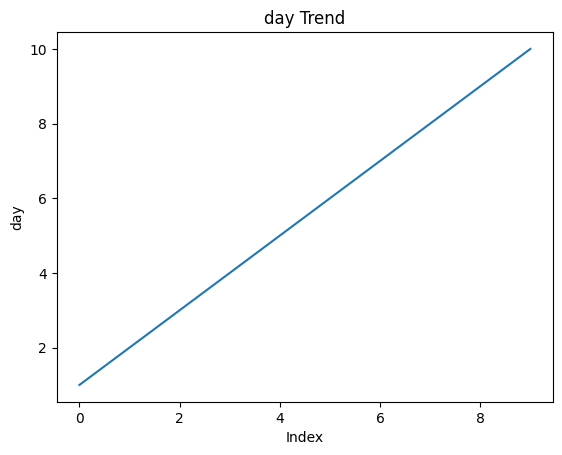


====== DATA ANALYZER ======
1. Load Dataset
2. Show Basic Info
3. Clean Data
4. Show Summary Stats
5. Visualize Data
6. Exit

Choose a numeric column to plot:
1. day
2. temp
3. humidity
4. rainfall


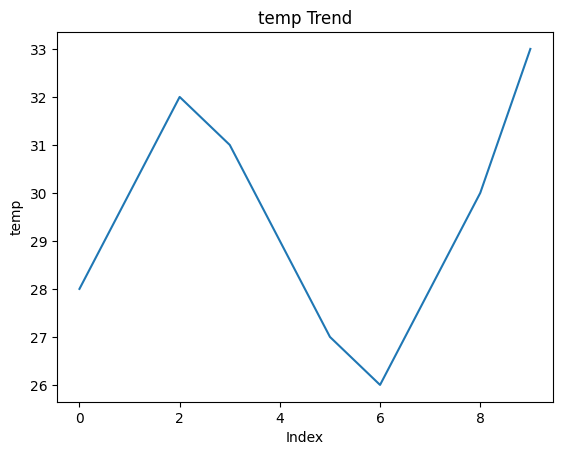


====== DATA ANALYZER ======
1. Load Dataset
2. Show Basic Info
3. Clean Data
4. Show Summary Stats
5. Visualize Data
6. Exit


KeyboardInterrupt: Interrupted by user

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files # Import files for Colab
import io # Import io for reading uploaded files

def format_number(n):
    """Format numbers: remove decimals if not needed"""
    if pd.isna(n):
        return n
    return int(n) if float(n).is_integer() else round(float(n), 2)

def load_dataset():
    """Prompt user to select CSV or Excel file"""
    print("\nSelect a dataset (CSV or Excel)...")

    uploaded = files.upload()

    if not uploaded:
        print("No file selected.")
        return None

    file_name = list(uploaded.keys())[0]
    try:
        if file_name.endswith(".csv"):
            df = pd.read_csv(io.BytesIO(uploaded[file_name]))
        elif file_name.endswith(('.xlsx', '.xls')):
            df = pd.read_excel(io.BytesIO(uploaded[file_name]))
        else:
            print("Unsupported file format. Please upload a CSV or Excel file.")
            return None
        print(f"Dataset loaded: {file_name}")
        return df
    except Exception as e:
        print(f"Failed to load dataset: {e}")
        return None

def show_basic_info(df):
    print("\nBASIC INFO")
    print(df.head(), "\n")
    print("Columns:", df.columns.tolist())
    print("Shape:", df.shape)

def clean_data(df):
    print("\nCleaning numeric data...")
    for col in df.select_dtypes(include='number'):
        df[col] = df[col].apply(format_number)
    print("Data cleaned.")

def show_statistics(df):
    print("\nSUMMARY STATISTICS")
    stats = df.describe()
    formatted = stats.map(format_number) # Changed applymap to map
    print(formatted)

def visualize_data(df):
    num_cols = df.select_dtypes(include='number').columns.tolist()
    if not num_cols:
        print("No numeric columns to visualize.")
        return

    print("\nChoose a numeric column to plot:")
    for i, col in enumerate(num_cols, 1):
        print(f"{i}. {col}")

    try:
        choice = int(input("Column number: ")) - 1
        if 0 <= choice < len(num_cols):
            col_name = num_cols[choice]
            df[col_name].plot(kind="line")
            plt.title(f"{col_name} Trend")
            plt.xlabel("Index")
            plt.ylabel(col_name)
            plt.show()
        else:
            print("Invalid choice")
    except:
        print("Input must be a number")

def menu():
    df = None
    while True:
        print("\n====== DATA ANALYZER ======")
        print("1. Load Dataset")
        print("2. Show Basic Info")
        print("3. Clean Data")
        print("4. Show Summary Stats")
        print("5. Visualize Data")
        print("6. Exit")

        choice = input("Choose option: ")

        if choice == "1":
            df = load_dataset()
        elif choice == "2" and df is not None:
            show_basic_info(df)
        elif choice == "3" and df is not None:
            clean_data(df)
        elif choice == "4" and df is not None:
            show_statistics(df)
        elif choice == "5" and df is not None:
            visualize_data(df)
        elif choice == "6":
            print("Goodbye!")
            break
        else:
            print("Load dataset first or choose a valid option!")

if __name__ == "__main__":
    menu()